In [1]:
import torch
print(torch.__version__)

from loss_functions import *
from model_testing import *
from adversarial_attacks import *
from modules import *
from data_loader import *

import os

#GPU/CUDA setup
if torch.cuda.is_available():
    print("CUDA enabled!")
device = 'cuda:0'
os.environ['CUDA_VISIBLE_DEVICES'] = ','.join(f'{i}' for i in range(1))

data_folder = 'data'
batch_size = 250
n_workers = 0
random_seed = 0

# download MNIST data
test_loader = get_test_loader(data_folder, batch_size, shuffle=True, num_workers=n_workers, pin_memory=True)

# download MNIST data
train_loader, val_loader = get_train_val_loader(data_folder, batch_size, random_seed, augment=False, val_size=0.2,
                           shuffle=True, show_sample=False, num_workers=0, pin_memory=True)

2.2.0
CUDA enabled!


In [2]:
paths = {"B30": "saved_model\mnist_model\mnist_cae_balanced_clstsep_1500_0.002_250_True_0.0_20_1_1_1_1.0_0.0_30_4_32_1\mnist_cae00750.pth",
         "S30": "saved_model\mnist_model\mnist_cae_standard_default_1500_0.002_250_False_0.5_20_1_1_1_0.8_0.2_30_4_32_1\mnist_cae00750.pth",
         "S15": "saved_model\mnist_model\mnist_cae_standard_default_1500_0.002_250_False_0.5_20_1_1_1_0.8_0.2_15_4_32_1\mnist_cae00750.pth",
         "RS30": "saved_model\mnist_model\mnist_cae_adversarial_standard_default_pdglinf_ce_20_0.3_0.02_True_1500_0.002_250_False_0.5_20_1_1_1_0.8_0.2_1.0_30_4_32_1\mnist_cae_adv00750.pth",
         "RB30": "saved_model\mnist_model\mnist_cae_adversarial_balanced_clstsep_pdglinf_ce_20_0.3_0.02_True_800_0.002_250_True_0.0_20_1_1_1_1.0_0.0_1.0_30_4_32_1\mnist_cae_adv00750.pth",
         "FTB30n": "saved_model\mnist_model\mnist_cae_FT_30_nothing_pdglinf_ce_20_0.3_0.02_True_20_0.002_250_20_1_1_1_1.0_0.0_1\mnist_cae_adv00020.pth",
         "FTB30a": "saved_model\mnist_model\mnist_cae_FT_30_autoencoder_pdglinf_ce_20_0.3_0.02_True_20_0.002_250_20_1_1_1_1.0_0.0_1\mnist_cae_adv00020.pth",
         "FTB30p": "saved_model\mnist_model\mnist_cae_FT_30_prototypes_pdglinf_ce_20_0.3_0.02_True_20_0.002_250_20_1_1_1_1.0_0.0_1\mnist_cae_adv00020.pth"}

s15 = torch.load(paths["S15"])
s30 = torch.load(paths["S30"])
b30 = torch.load(paths["B30"])
rs30 = torch.load(paths["RS30"])
rb30 = torch.load(paths["RB30"])
ftb30n = torch.load(paths["FTB30n"])
ftb30a = torch.load(paths["FTB30a"])
ftb30p = torch.load(paths["FTB30p"])

s15.to(device)
s30.to(device)
b30.to(device)
rs30.to(device)
rb30.to(device)
ftb30a.to(device)
ftb30n.to(device)
ftb30p.to(device)

print("MODELS LOADED")

MODELS LOADED


c:\Users\jiras\workspace\TFG\Self-explainable-models\PyTorch-PrototypeDL-master\model_testing.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


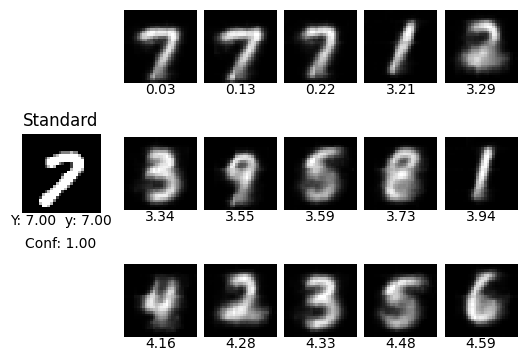

c:\Users\jiras\workspace\TFG\Self-explainable-models\PyTorch-PrototypeDL-master\model_testing.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


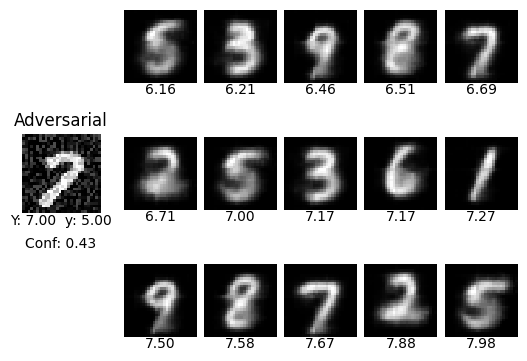

test set:
	accuracy: 0.9926
adversarial test set:
	accuracy: 0.6109
	Correctly classified and the closest prototype is different: 0.2512
	Correctly classified and the closest prototype is the same: 0.3597
	Incorrectly classified and the closest prototype is the same: 0.0007
	Incorrectly classified and the closest prototype is different: 0.3884


In [4]:
model1 = b30

alpha = 0.01
iters = 40
eps = 0.3
random_start = True

examples_type = "idp"
n_examples = 1

attack = partial(PGDLInf_attack, alpha=alpha, iters=iters, eps=eps, random_start=random_start)
loss = partial(Loss_1, model = model1, alpha1=0, alpha2 = 1, objective = "cecc", force_class = None, change_expl = None)

test_adversarial(model1, test_loader, attack=attack, loss=loss, n_examples=n_examples, examples_type=examples_type)

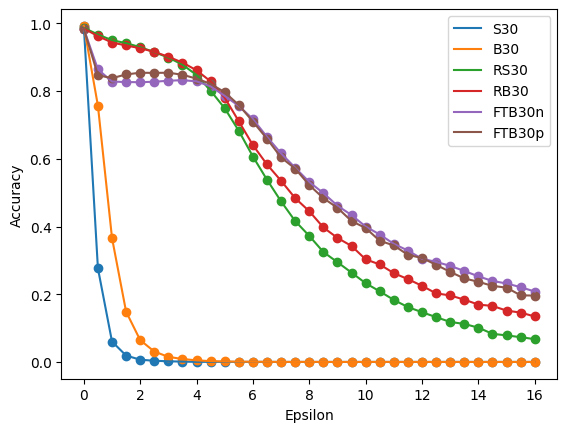

In [3]:
iters = 40
max_eps = 16
step = 0.5
random_start = True

models = [s30, b30, rs30, rb30, ftb30n, ftb30p]
model_names = ["S30", "B30", "RS30", "RB30", "FTB30n", "FTB30p"]
attack = partial(PGDLInf_attack, iters=iters, random_start=True)
loss = CELoss
#loss = partial(Loss_1, alpha1=0, alpha2 = 1, objective = "cecc", force_class = None, change_expl = None)

adversarial_attacks_eps_plot(models, model_names, test_loader, attack, loss, max_eps, step=step)

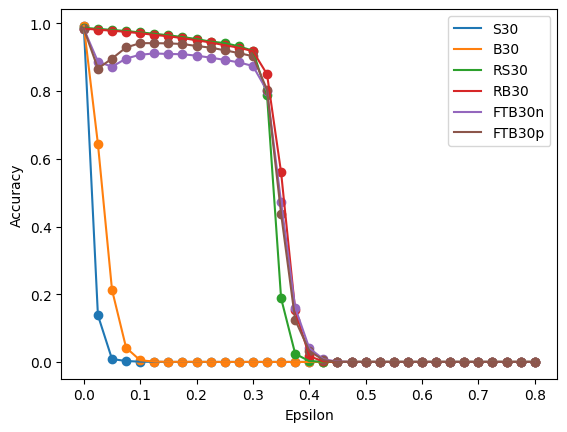

In [4]:
iters = 40
max_eps = 0.8
step = 0.025
random_start = True

models = [s30, b30, rs30, rb30, ftb30n, ftb30p]
model_names = ["S30", "B30", "RS30", "RB30", "FTB30n", "FTB30p"]
attack = partial(PGDLInf_attack, iters=iters, random_start=random_start)
loss = CELoss

adversarial_attacks_eps_plot(models, model_names, test_loader, attack, loss, max_eps, step=step)